# Week 3.1 Audio Features and Spotify Playlists 

For the second part of this week's lecture we are going to look at 

* The audio features that``Spotify's API`` will give us about **any track in its collection**


* How these can be used to make recommendations based on song similarity 


First we need to install the ``spotipy`` library. The Spotify API is just a ``REST API`` like we might have seen before, so we could access using the ``request`` library ourselves, but this just wraps up some stuff nicely for us!

In [4]:
## Install library 
!pip install spotipy


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
##These relate to an App on my developer account at Spotify and are used for authentication 
SPOTIPY_CLIENT_ID='4547ac9120de4cbba75a19ee6dc3b908'
SPOTIPY_CLIENT_SECRET='75fa035f5a0b47b7868e69a93ef878b4'

In [4]:
##First we authenticate
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(SPOTIPY_CLIENT_ID,SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

C:\Users\86158\miniconda3\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


### Pick a playlist 

Now we need to pick a playlist to get some audio features for. 

To get the ``id``, sign into the [Spotify Web Player](https://open.spotify.com/) in your browser. When you have chosen a playlist (can be one of yours, or someone elses), the ``id`` will be the string of letters and numbers at the end of the ``URL``. 

In [5]:
#Put in the ID of a Spotify playlist of your choosing
playlist_id = '2lGgVTsqaU0muyyT3zbU4G'

In [6]:
limit = 78
trim = True

In [7]:
#Get playlsit
playlist = sp.playlist(playlist_id)
#Extract tracks
tracks = playlist["tracks"]["items"]
if trim:
    tracks = tracks[-limit:]
#Extract track IDs
ids = [track["track"]["id"] for track in tracks]
#Get audio features for tracks
features =  pd.DataFrame(sp.audio_features(ids))    
#Label dataframe rows with track name and artist
labels = [track["track"]["artists"][0]["name"] + " - "+ track["track"]["name"] for track in tracks]
features.index = labels

In [8]:
features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
Alela Diane - The Pirate's Gospel,0.595,0.432,0,-6.418,0,0.0271,0.931,0.008670,0.113,0.430,95.885,audio_features,5azaaeLKtKevqs8u1XHRHI,spotify:track:5azaaeLKtKevqs8u1XHRHI,https://api.spotify.com/v1/tracks/5azaaeLKtKev...,https://api.spotify.com/v1/audio-analysis/5aza...,175453,4
Bob Dylan - You Belong To Me,0.629,0.259,9,-16.128,1,0.0396,0.843,0.005220,0.653,0.307,87.495,audio_features,0aD0Ec4Wm1tiAPr8gSN3RZ,spotify:track:0aD0Ec4Wm1tiAPr8gSN3RZ,https://api.spotify.com/v1/tracks/0aD0Ec4Wm1ti...,https://api.spotify.com/v1/audio-analysis/0aD0...,189507,4
Alela Diane - Tired Feet,0.373,0.214,5,-8.672,0,0.0337,0.973,0.000006,0.133,0.193,179.175,audio_features,20bBfcccYuwPg2kDRtZWn0,spotify:track:20bBfcccYuwPg2kDRtZWn0,https://api.spotify.com/v1/tracks/20bBfcccYuwP...,https://api.spotify.com/v1/audio-analysis/20bB...,160660,4
Alela Diane - Oh! My Mama,0.544,0.127,3,-8.793,1,0.0346,0.962,0.004880,0.103,0.246,138.720,audio_features,5DEQSzcqHkzPQVJPiUi8qo,spotify:track:5DEQSzcqHkzPQVJPiUi8qo,https://api.spotify.com/v1/tracks/5DEQSzcqHkzP...,https://api.spotify.com/v1/audio-analysis/5DEQ...,192320,4
I Am Oak - On Trees And Birds And Fire,0.566,0.310,10,-13.572,1,0.0411,0.892,0.077900,0.114,0.698,200.092,audio_features,4x1nUSFFppEZZcfijHV1wy,spotify:track:4x1nUSFFppEZZcfijHV1wy,https://api.spotify.com/v1/tracks/4x1nUSFFppEZ...,https://api.spotify.com/v1/audio-analysis/4x1n...,176795,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Edward Sharpe & The Magnetic Zeros - Home,0.542,0.589,2,-6.623,1,0.0318,0.292,0.000522,0.177,0.137,111.665,audio_features,7w5cxTEzp1rfV3KCy0Bd5N,spotify:track:7w5cxTEzp1rfV3KCy0Bd5N,https://api.spotify.com/v1/tracks/7w5cxTEzp1rf...,https://api.spotify.com/v1/audio-analysis/7w5c...,303200,4
Justin Townes Earle - One More Night In Brooklyn,0.762,0.376,9,-10.547,1,0.0396,0.520,0.000021,0.108,0.571,118.357,audio_features,4xv3P9DiKTKMfFaClyZtgn,spotify:track:4xv3P9DiKTKMfFaClyZtgn,https://api.spotify.com/v1/tracks/4xv3P9DiKTKM...,https://api.spotify.com/v1/audio-analysis/4xv3...,184320,4
Lake Street Dive - Bad Self Portraits,0.553,0.599,8,-5.446,0,0.0458,0.443,0.000008,0.105,0.683,167.880,audio_features,4FGmmkujpwdkexqLobrp80,spotify:track:4FGmmkujpwdkexqLobrp80,https://api.spotify.com/v1/tracks/4FGmmkujpwdk...,https://api.spotify.com/v1/audio-analysis/4FGm...,204787,4
The Wood Brothers - Postcards From Hell,0.465,0.242,9,-10.460,1,0.0298,0.955,0.022300,0.126,0.315,102.812,audio_features,72i7dwVrHdfDnr3qmINh5U,spotify:track:72i7dwVrHdfDnr3qmINh5U,https://api.spotify.com/v1/tracks/72i7dwVrHdfD...,https://api.spotify.com/v1/audio-analysis/72i7...,284862,4


### Audio Features 

What audio features do we get? You can check out the [Spotify API Documentation](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features)

Some relate to known musical features such as ``key``, ``mode``,``tempo`` and ``time_signature``. 

Some are more related to the signal of the audio file itself (``loudness``, ``duration_ms``).

Some are more descriptive (``danceability``, `liveness` etc..). As these are self defined by Spotify, how subjective do you think these ones might be?

In [9]:
#Check out features
features.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [10]:
#Drop columns that are not audio features
my_features = ['danceability', 'energy', 'key', 
            'loudness', 'mode', 'speechiness', 
            'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo', 'duration_ms', 
            'time_signature']
features = features[my_features]
features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Alela Diane - The Pirate's Gospel,0.595,0.432,0,-6.418,0,0.0271,0.931,0.008670,0.113,0.430,95.885,175453,4
Bob Dylan - You Belong To Me,0.629,0.259,9,-16.128,1,0.0396,0.843,0.005220,0.653,0.307,87.495,189507,4
Alela Diane - Tired Feet,0.373,0.214,5,-8.672,0,0.0337,0.973,0.000006,0.133,0.193,179.175,160660,4
Alela Diane - Oh! My Mama,0.544,0.127,3,-8.793,1,0.0346,0.962,0.004880,0.103,0.246,138.720,192320,4
I Am Oak - On Trees And Birds And Fire,0.566,0.310,10,-13.572,1,0.0411,0.892,0.077900,0.114,0.698,200.092,176795,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Edward Sharpe & The Magnetic Zeros - Home,0.542,0.589,2,-6.623,1,0.0318,0.292,0.000522,0.177,0.137,111.665,303200,4
Justin Townes Earle - One More Night In Brooklyn,0.762,0.376,9,-10.547,1,0.0396,0.520,0.000021,0.108,0.571,118.357,184320,4
Lake Street Dive - Bad Self Portraits,0.553,0.599,8,-5.446,0,0.0458,0.443,0.000008,0.105,0.683,167.880,204787,4
The Wood Brothers - Postcards From Hell,0.465,0.242,9,-10.460,1,0.0298,0.955,0.022300,0.126,0.315,102.812,284862,4


### Task 1 - Sort by Audio Features 

In order to get a feel for features and what they represent, we are now going to use them to sort the playlist. 

Try out some different features. 

* What do low and high values for the each of the features sound like? 


* Given your knowledge of the songs, does this feel correct? 


* If there is a feature you are not sure what it measures, are you able to get a better understanding by looking at the sorted tracks?


* Does this sorted order of the playlist flow well?


In [22]:
sort_by = 'energy'
features.sort_values(by = sort_by, ascending = False)[:8]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
The Strumbellas - Young & Wild,0.568,0.936,0,-3.266,1,0.0351,0.04190,0.000000,0.4460,0.453,132.046,267920,4
The Apache Relay - Katie Queen Of Tennessee,0.560,0.913,2,-5.388,1,0.0308,0.10100,0.000207,0.2550,0.723,127.022,204653,4
The Lone Bellow - Green Eyes and a Heart of Gold,0.321,0.895,2,-6.087,1,0.1200,0.03140,0.000000,0.3640,0.385,127.082,252853,4
Twin Forks - Back To You,0.547,0.848,2,-5.622,1,0.0680,0.00594,0.000000,0.0743,0.393,128.987,170960,4
George Ezra - Cassy O',0.544,0.847,2,-4.794,1,0.0385,0.04620,0.000000,0.3360,0.168,97.974,184133,4
The Lone Bellow - Bleeding Out,0.466,0.800,0,-5.848,1,0.0414,0.03820,0.000000,0.2710,0.653,94.153,221707,3
Deer Tick - Twenty Miles,0.501,0.784,0,-7.089,1,0.0334,0.52900,0.076600,0.1310,0.340,113.643,223933,4
The Lumineers - Cleopatra,0.535,0.763,8,-6.751,1,0.0407,0.25300,0.000078,0.0956,0.465,151.437,201413,4


In [23]:
sort_by = 'energy'
features.sort_values(by = sort_by, ascending = True)[:8]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Westerman - Mother Song,0.573,0.113,7,-16.915,1,0.0460,0.965,0.001170,0.1100,0.251,136.241,173928,4
Alela Diane - Oh! My Mama,0.544,0.127,3,-8.793,1,0.0346,0.962,0.004880,0.1030,0.246,138.720,192320,4
Fleet Foxes - Tiger Mountain Peasant Song,0.654,0.148,6,-11.963,1,0.0327,0.929,0.001600,0.0895,0.287,130.738,208973,3
Iron & Wine - Naked as We Came,0.386,0.205,4,-16.699,1,0.0366,0.653,0.044800,0.1060,0.623,172.373,152613,4
Alela Diane - Tired Feet,0.373,0.214,5,-8.672,0,0.0337,0.973,0.000006,0.1330,0.193,179.175,160660,4
Aldous Harding - Fever,0.604,0.217,5,-8.578,1,0.0443,0.625,0.000176,0.1080,0.406,173.717,257293,4
Haley Heynderickx - Drinking Song,0.621,0.219,0,-11.305,1,0.0381,0.890,0.000014,0.1110,0.253,120.495,195846,3
The Wood Brothers - Postcards From Hell,0.465,0.242,9,-10.460,1,0.0298,0.955,0.022300,0.1260,0.315,102.812,284862,4


### Task 2 - Song Similarity 

Now lets investigate which songs in the playlist are similar to each other based on a given set of features. 

Change the features in ``my_subset_features`` and re-run the code each time. 

* Do you think songs that have **high cosine similarity** (e.g. close to 1) are similar songs? 


* Do different subsets of features make seem to provide better results in this regard?

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity as cosine
from sklearn.preprocessing import StandardScaler

In [33]:
my_subset_features = ['energy', 'key', 
            'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo','time_signature']

In [34]:
#Get subset
subset_features = features[my_subset_features]
#Standardise
scaled_features = StandardScaler().fit_transform(subset_features)
#Get cosine distances
similarities = cosine(scaled_features)
#Visualise 
similarities = pd.DataFrame(similarities, columns = features.index, index = features.index)
similarities.style.background_gradient(cmap='Greens')

### Task 3 - Top N Recommendations

Now we're going to use the ``cosine similarity`` to make some recommedations! 

Pick a track (``artist - title``) and see which ``n`` songs are closed to it.

* Are these good recommendations based on the seed track?


* For higher values of n, how far before the recommendations start getting irrelevant?


* Again, try different subsets of features (you will need to go back to Task 2 and run the code again)

In [36]:
track = "Alela Diane - The Pirate's Gospel"

In [39]:
#How many tracks to recommend
n = 10

In [40]:
similarities.sort_values(by = track, ascending=False)[track].index[1:n+1]

Index(['The Tallest Man On Earth - The Gardener',
       'Beirut - Postcards from Italy', 'Kevin Morby - Valley',
       'Haley Heynderickx - Francis', 'The Lumineers - Ho Hey',
       'The Tallest Man On Earth - Where Do My Bluebird Fly',
       'The Franklin Electric - Answers', 'Blanco White - El Búho',
       'Moriarty - Diamonds Never Die', 'Bahamas - Lost In The Light'],
      dtype='object')

### Task 4 - PCA Visualisation

Do songs near each other sound the same? Given one, would the nearby songs make good recommendations?

You may have to reduce the size of ``subset_features`` (and re-run code from Task 2 again) if there are too many songs to see properly!

In [41]:
num_dimensions = 2 

#Reduce dimensions
pca = PCA(n_components=num_dimensions)
reduced_features = pca.fit_transform(scaled_features)

<Figure size 800x800 with 0 Axes>

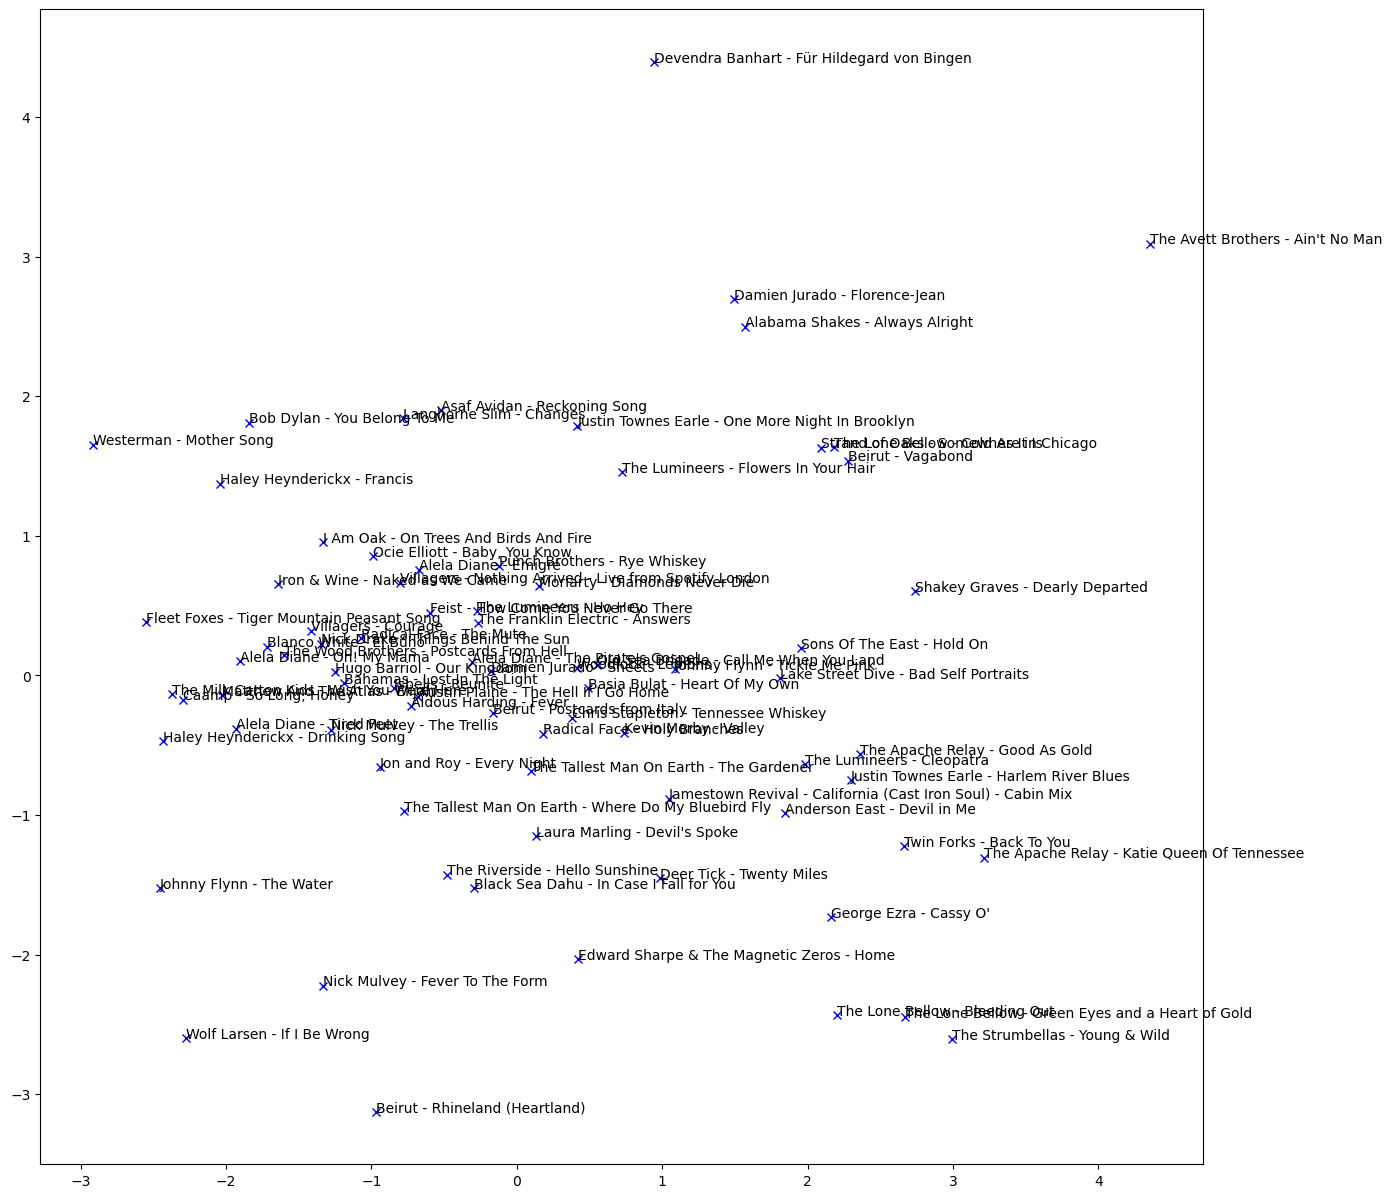

In [42]:
#Plot
plt.figure(figsize=(8, 8))
fig,ax = plt.subplots(figsize=(15,15))
x = reduced_features[:,0]
y = reduced_features[:,1]
ax.plot(x,y,"bx")
annotations = subset_features.index
for i, label in enumerate(annotations):
    ax.annotate(label, (x[i], y[i]),alpha=1)